In [15]:
import src.data_utils as dutils
import src.model_utils as mutils
import src.distributions as distr

import numpy as np
import torch
import src.distributions as dist
import matplotlib.pyplot as plt
import torch.nn as nn
from functools import partial
import tissue_2d as t2d

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Discrete Tissue Slicing (NMC over finite candidate designs)


------- Iteration 1/4 -------
Finding best design...


100%|██████████| 100/100 [00:43<00:00,  2.31it/s]


Executed design; best_eig: 3.465012, design_params: {'slope': tensor(-0.3640), 'intercept': tensor(0.1390)}
Fitting posterior...


elbo = -85.761551: 100%|██████████| 1500/1500 [00:32<00:00, 46.48it/s] 


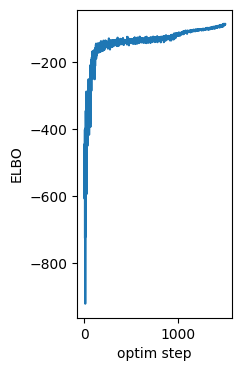

Fitted posterior; thetas_MAP: tensor([[ 1.1307,  3.3797, -0.8841,  0.8562]])
Plotting results...


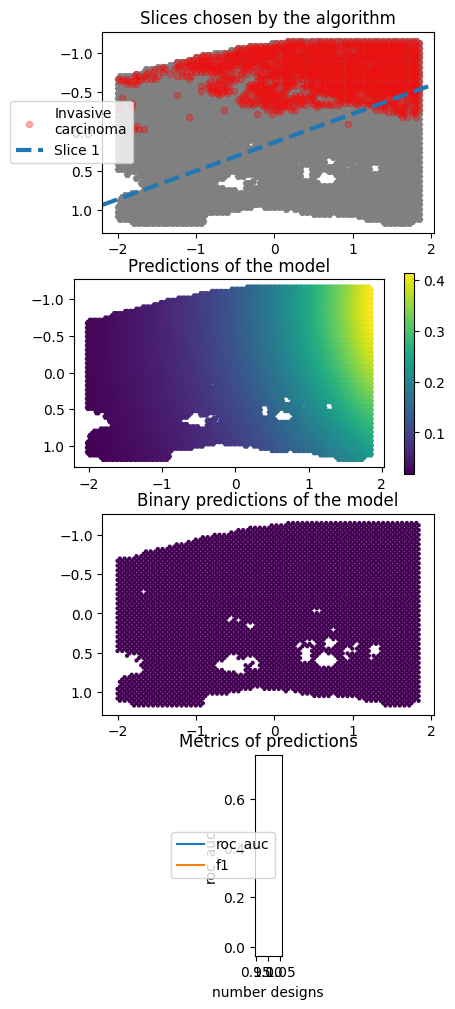

Plotted results.

------- Iteration 2/4 -------
Finding best design...


100%|██████████| 100/100 [00:40<00:00,  2.46it/s]


Executed design; best_eig: 1.688335, design_params: {'slope': tensor(0.8391), 'intercept': tensor(-0.3789)}
Fitting posterior...


elbo = -80.815445: 100%|██████████| 1500/1500 [00:30<00:00, 48.40it/s]


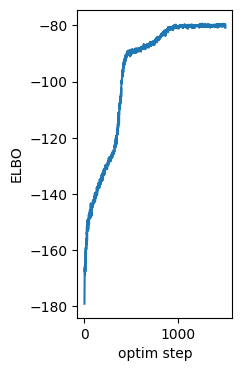

Fitted posterior; thetas_MAP: tensor([[ 0.8118,  0.0918, -1.1027,  9.1257]])
Plotting results...


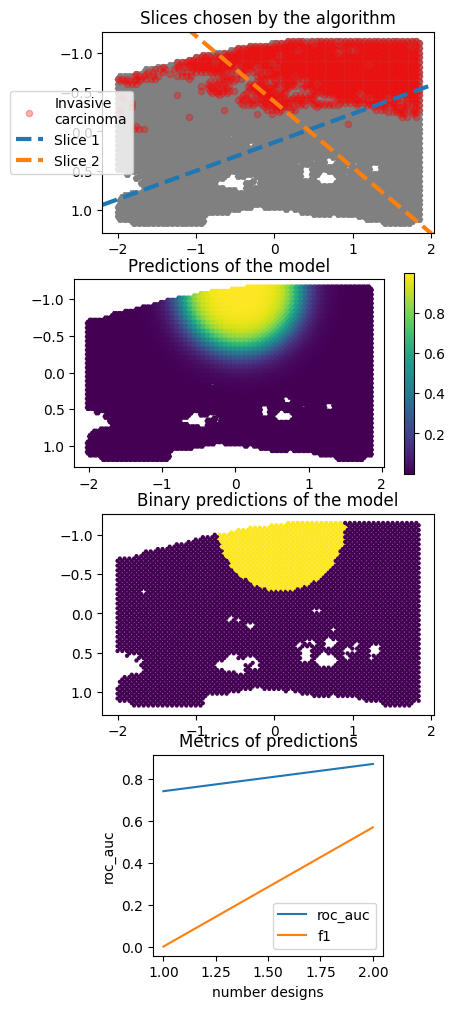

Plotted results.

------- Iteration 3/4 -------
Finding best design...


100%|██████████| 100/100 [00:38<00:00,  2.57it/s]


Executed design; best_eig: 1.539949, design_params: {'slope': tensor(-0.3640), 'intercept': tensor(-0.3789)}
Fitting posterior...


elbo = -79.881828: 100%|██████████| 1500/1500 [00:33<00:00, 44.61it/s]


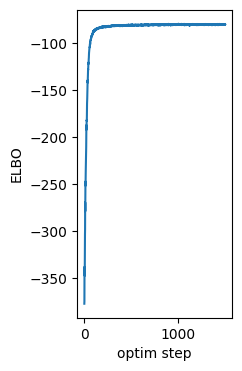

Fitted posterior; thetas_MAP: tensor([[ 1.7626,  1.2405, -1.6710,  4.6854]])
Plotting results...


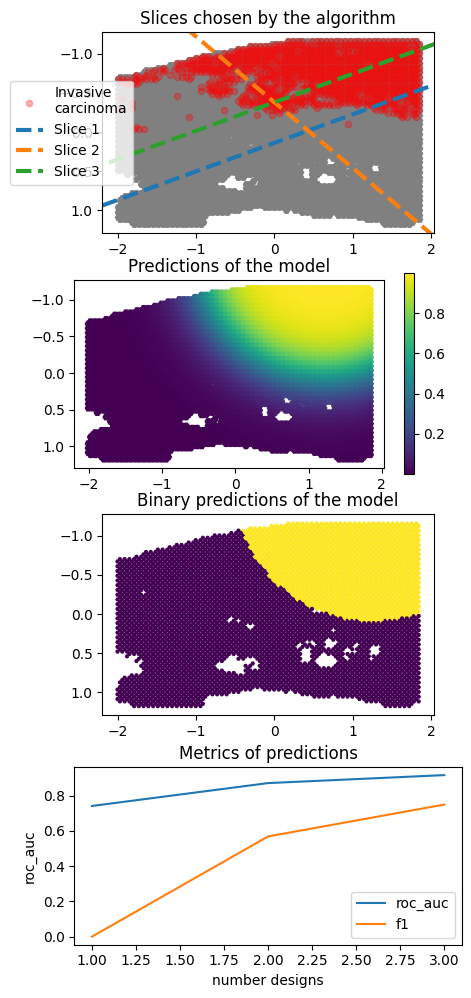

Plotted results.

------- Iteration 4/4 -------
Finding best design...


100%|██████████| 100/100 [00:45<00:00,  2.21it/s]


Executed design; best_eig: 1.577679, design_params: {'slope': tensor(0.3640), 'intercept': tensor(-0.3789)}
Fitting posterior...


elbo = -119.398102: 100%|██████████| 1500/1500 [00:31<00:00, 47.62it/s]


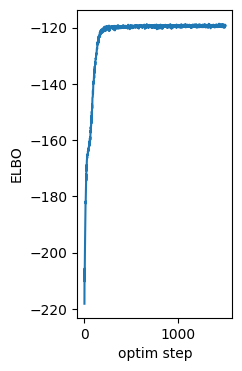

Fitted posterior; thetas_MAP: tensor([[ 1.3038, -0.0948, -1.6601,  5.3878]])
Plotting results...


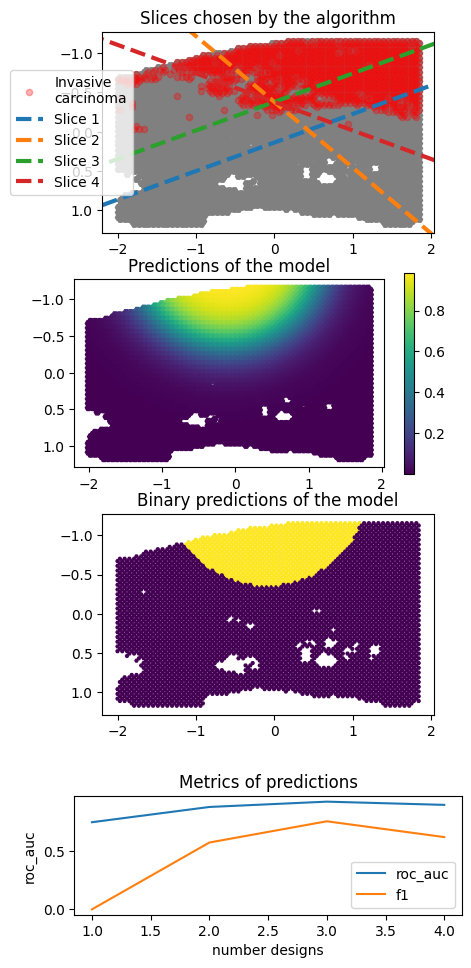

Plotted results.


In [ ]:
# data
datamodule = t2d.Prostate_cancer_2d()
X,y = datamodule.get_data(processed=True)
slice_radius_pixel = 2
slice_radius = slice_radius_pixel / datamodule.norm_params['std_both']
tissue = t2d.Tissue_discrete(X, y, slice_radius = slice_radius)

# distributions
r_prior = torch.tensor([4.0])
temp_prior = torch.tensor([1.0])
mu = torch.tensor([torch.log(r_prior),0.,0., torch.log(temp_prior) ])
std = torch.tensor([1.,10.,10.,1.])
prior = t2d.Circle_prior(mu=mu,std=std)
predictive = t2d.Circle_predictive()

# optimization
eig_method = partial(mutils.eig_NMC, n_outer=500, n_inner=200)
eig_optim_method = mutils.eig_discrete_optim
varinf_method = partial(mutils.variational_inference, print_every=50, n_steps=1500, verbose=True)
n_designs = 4

# execution
experiment, thetas_MAP, metric_values, metric_names = mutils.OED_fit(
    tissue, prior, predictive, n_designs, eig_method,eig_optim_method,varinf_method, verbose=False
)

### Continuous Tissue Slicing (maximize PCE over cont. design space)

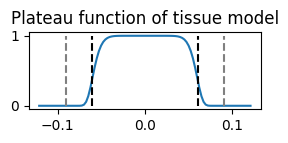


------- Iteration 1/4 -------
Finding best design...


EIG = 1.990631: 100%|██████████| 200/200 [00:25<00:00,  7.72it/s]


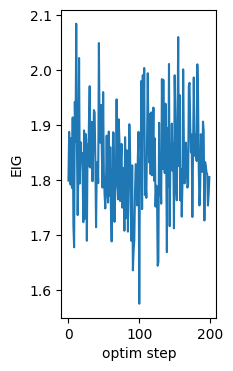

Executed design; best_eig: 1.805262, design_params: {'slope': tensor(0.1059, requires_grad=True), 'intercept': tensor(0.8527, requires_grad=True)}
Fitting posterior...


elbo = -2170.819824: 100%|██████████| 1500/1500 [01:01<00:00, 24.38it/s]


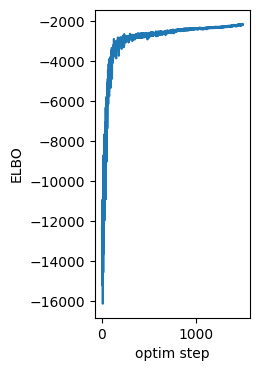

Fitted posterior; thetas_MAP: tensor([[ 1.1304,  1.4927, -2.6901,  0.5337]])

------- Iteration 2/4 -------
Finding best design...


EIG = 0.897899: 100%|██████████| 200/200 [00:26<00:00,  7.58it/s]


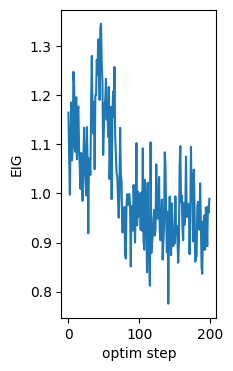

Executed design; best_eig: 0.988941, design_params: {'slope': tensor(1.4088, requires_grad=True), 'intercept': tensor(-0.0976, requires_grad=True)}
Fitting posterior...


elbo = -813.871277: 100%|██████████| 1500/1500 [01:04<00:00, 23.23it/s]


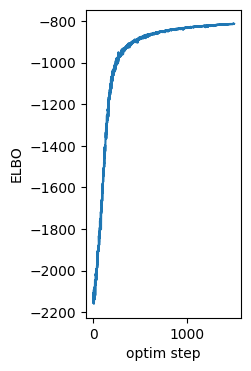

Fitted posterior; thetas_MAP: tensor([[ 4.8787,  0.9250, -5.1802,  7.4503]])

------- Iteration 3/4 -------
Finding best design...


EIG = 0.098998: 100%|██████████| 200/200 [00:24<00:00,  8.23it/s]


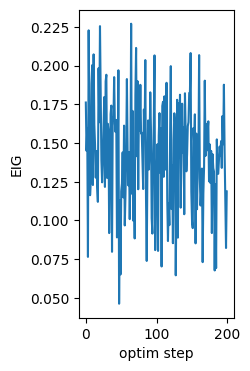

Executed design; best_eig: 0.118773, design_params: {'slope': tensor(1.3528, requires_grad=True), 'intercept': tensor(-0.2997, requires_grad=True)}
Fitting posterior...


elbo = -782.162964: 100%|██████████| 1500/1500 [01:03<00:00, 23.44it/s]


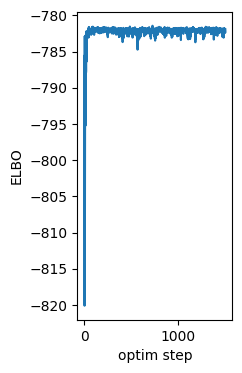

Fitted posterior; thetas_MAP: tensor([[ 4.8711,  0.9188, -5.1846,  7.4586]])

------- Iteration 4/4 -------
Finding best design...


EIG = 0.054194: 100%|██████████| 200/200 [00:28<00:00,  6.91it/s]


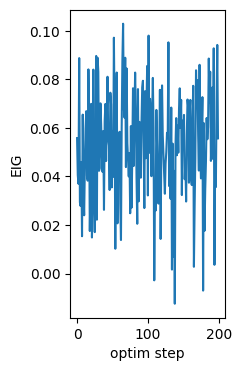

Executed design; best_eig: 0.055712, design_params: {'slope': tensor(1.3936, requires_grad=True), 'intercept': tensor(-0.2877, requires_grad=True)}
Fitting posterior...


elbo = -780.946594: 100%|██████████| 1500/1500 [01:09<00:00, 21.44it/s]


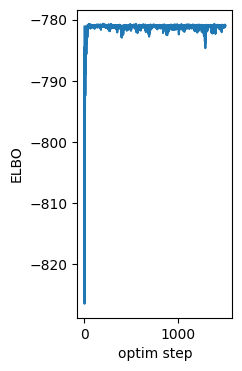

Fitted posterior; thetas_MAP: tensor([[ 4.8752,  0.9141, -5.1847,  7.4736]])
Plotting results...


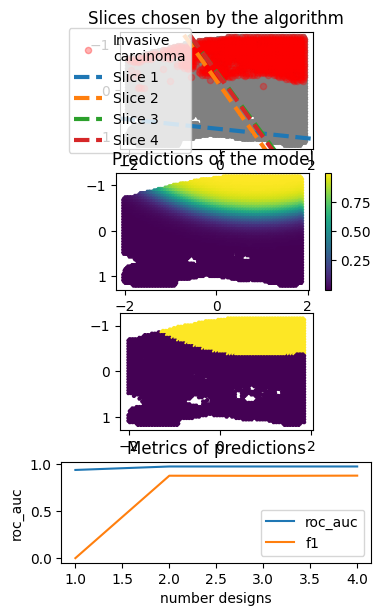

Plotted results.


In [40]:
# data
datamodule = t2d.Prostate_cancer_2d()
X,y = datamodule.get_data(processed=True)
slice_radius_pixel = 2
slice_radius = slice_radius_pixel / datamodule.norm_params['std_both']
tissue = t2d.Tissue_cont_indicator(X, y, slice_radius)
torch.autograd.set_detect_anomaly(True)

# distributions
r_prior = torch.tensor([4.0])
temp_prior = torch.tensor([1.0])
mu = torch.tensor([torch.log(r_prior),0.,0., torch.log(temp_prior) ])
std = torch.tensor([1.,10.,10.,1.])
prior = t2d.Circle_prior(mu=mu,std=std)
predictive = t2d.Circle_predictive(with_weights=True)

# optimization
eig_method = partial(mutils.eig_PCE, n_outer=200, n_inner=30)
eig_optim_method = partial(mutils.eig_cont_optim, n_steps=200)
optim_args = {
    'intercept': ('minmax', -2.0, 2.0),}
varinf_method = partial(mutils.variational_inference, 
                        print_every=25, 
                        n_steps=1500, 
                        verbose=True,
                        optim_args=optim_args)
n_designs = 4

# main execution
experiment, thetas_MAP, metric_values, metric_names = mutils.OED_fit(
    tissue, prior,predictive,n_designs,eig_method,eig_optim_method,varinf_method, verbose=False)